# HEART DISEASE PREDICTION USING ECG

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Importing the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\acer\Jupyter-projects\heart.csv')

## Exploratory Data Analysis

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

In [6]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [7]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

### Looking for null value

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Taking Care of Duplicate Values

In [9]:
data_dup = data.duplicated().any()

In [10]:
data_dup

True

In [11]:
data = data.drop_duplicates()

In [12]:
data_dup = data.duplicated().any()

In [13]:
data_dup

False

### Data Processing

In [14]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

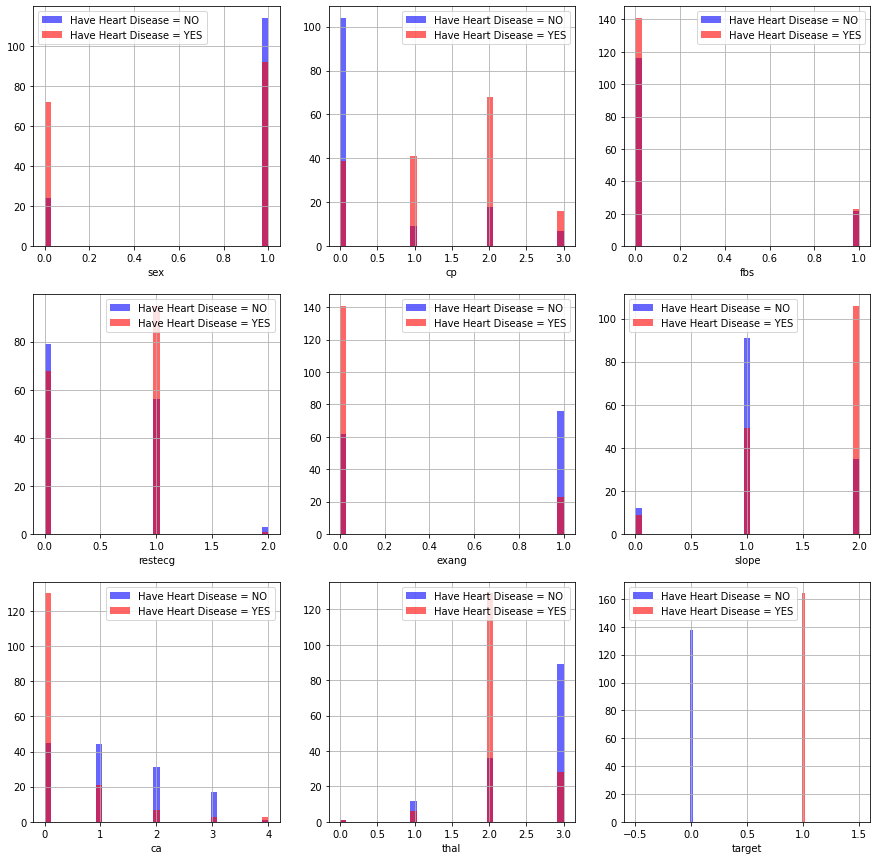

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cate_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

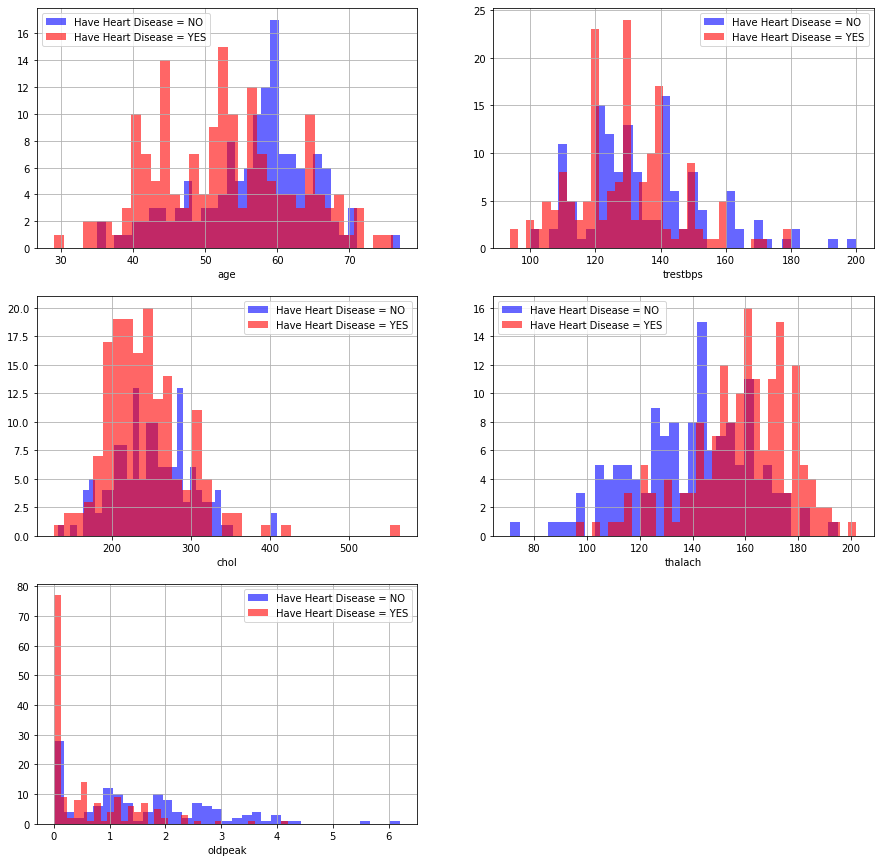

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Age vs. Max Heart Rate for Heart Disease

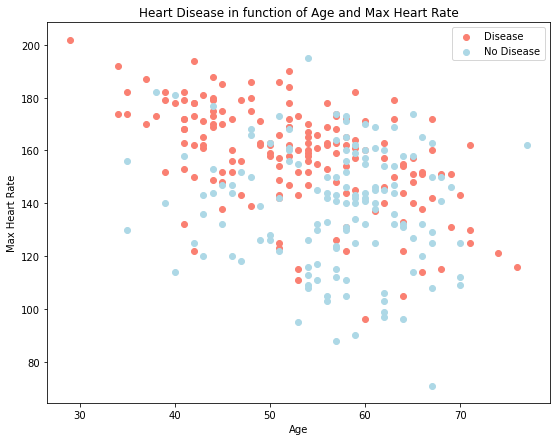

In [19]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Correlation Matrix

(14.5, -0.5)

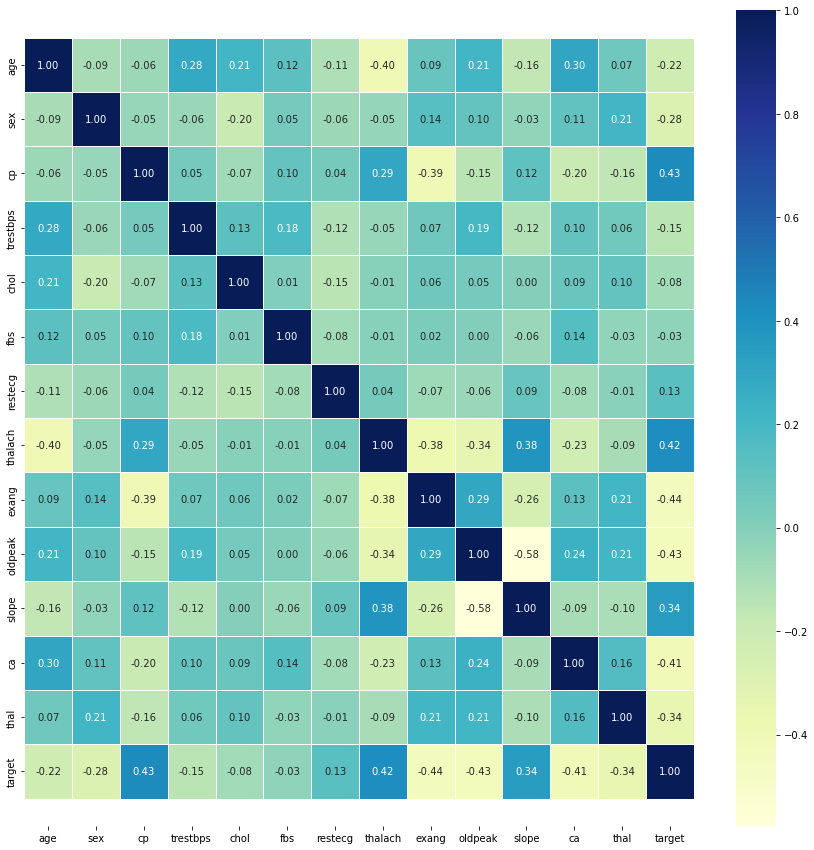

In [20]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Encoding Categorical Data

In [21]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [22]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [23]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

### Feature Scaling

In [24]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.00,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.10,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.60,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.00,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.90,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [27]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.27,1,-0.38,-0.67,0.81,-0.04,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.16,1,0.48,-0.84,0.24,1.77,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.72,1,0.76,-1.40,-1.07,1.34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.73,1,0.94,-0.84,0.50,-0.90,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.84,0,0.36,0.92,-1.91,0.74,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting The Dataset Into The Training Set And Test Set

In [28]:
X = data.drop('target',axis=1)

In [29]:
y = data['target']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [32]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

# MODEL BUILDING

### 1. Logistic Regression

In [34]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.27,1,-0.38,-0.67,0.81,-0.04,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.16,1,0.48,-0.84,0.24,1.77,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.72,1,0.76,-1.40,-1.07,1.34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.73,1,0.94,-0.84,0.50,-0.90,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.84,0,0.36,0.92,-1.91,0.74,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [37]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 86.31%
Test Result:
Accuracy Score: 75.41%


### 2.SVC

In [38]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

accuracy_score(y_test,y_pred2)

0.8032786885245902

In [39]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 20, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 88.80%
Test Result:
Accuracy Score: 80.33%


### 3.KNeighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [41]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


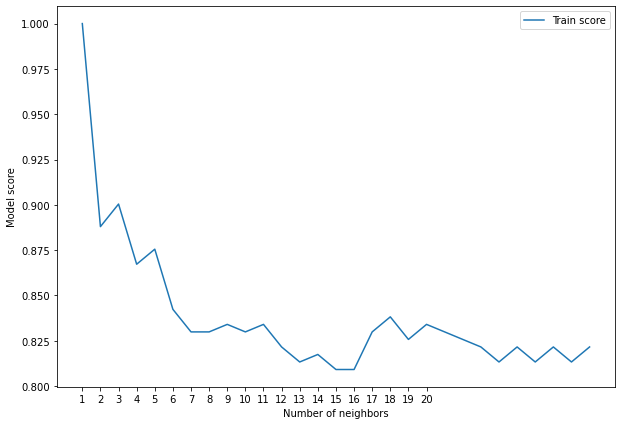

In [42]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.16%
Test Result:
Accuracy Score: 73.77%


In [44]:
data = pd.read_csv(r'C:\Users\acer\Jupyter-projects\heart.csv')

In [45]:
data = data.drop_duplicates()

In [46]:
X = data.drop('target',axis=1)
y=data['target']

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

###  4.Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7213114754098361

In [49]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 89.63%
Test Result:
Accuracy Score: 81.97%


### 5.Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [51]:
from sklearn.model_selection import GridSearchCV

n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1100}
Train Result:
Accuracy Score: 88.38%
Test Result:
Accuracy Score: 83.61%


### 6.Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8032786885245902

### Hyperparameter tuned GBC

In [53]:
gbc = GradientBoostingClassifier()
params_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gbc_cv = GridSearchCV(gbc,params_grid,cv=5)
gbc_cv.fit(X_train, y_train)
best_params = gbc_cv.best_params_
print(f"Best parameters: {best_params}")

gbc = GradientBoostingClassifier(**best_params)
gbc.fit(X_train, y_train)

print_score(gbc, X_train, y_train, X_test, y_test, train=True)
print_score(gbc, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
Train Result:
Accuracy Score: 85.89%
Test Result:
Accuracy Score: 88.52%


In [54]:
X=data.drop('target',axis=1)
y=data['target']

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_cv = RandomForestClassifier()
rf_cv.fit(X,y)

RandomForestClassifier()

# Prediction on New Data

###  Save Model Using Joblib

In [57]:
import joblib

In [58]:
joblib.dump(gbc,'model_joblib_heart')

['model_joblib_heart']

In [59]:
model = joblib.load('model_joblib_heart')

### GUI

In [60]:
from tkinter import *

In [61]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of Chest Pain (Cp)").grid(row=3)
Label(master, text="Enter Value of Resting Blood Pressure (trestbps)").grid(row=4)
Label(master, text="Enter Value of cholestrol (chol)").grid(row=5)
Label(master, text="Enter Value of Fasting Blood Sugar (fbs)").grid(row=6)
Label(master, text="Enter Value of Rest ECG (restecg)").grid(row=7)
Label(master, text="Enter Value of Maximum Heart rate  Achieved (thalach)").grid(row=8)
Label(master, text="Enter Value of Exercise Induced Angina (exang)").grid(row=9)
Label(master, text="Enter Value of ST depression induced by Excercise releated to rest (oldpeak)").grid(row=10)
Label(master, text="Enter Value of Slope of the peak Excercise ST segment (slope)").grid(row=11)
Label(master, text="Enter Value of Number of Major vessels coloured by fluroscopy (ca)").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()